Autolib is an electric car sharing company managed by the Bolloré group enterprise. It owns 3,000 cars (BlueCars, Utilib and Utilib_14), 860 stations where users can subscribe, pick up or drop off the cars and 4,400 parking spaces. 

Autolib wishes to expand to the European region and beyond and as part of their expansion strategy, the operations team seeks to verify that the measures they have put in place to ensure that there is even distribution of vehicles, stations and parking spaces across the city of Paris are effective, before they start going beyond Paris.

The Data Science team will conduct research and provide recommendations on the strategy to distribute their resources by responding to the following claims:
1.	On a given weekday, the average number of vehicles (BlueCars, Utilib and Utilib_14) taken is more than the average number of vehicles being returned.
2.	On a given day, the number of BlueCars taken is more than the total combined number of Utilib and Utilib_14 cars.
3.	The number of vehicles taken in postal code 75015 is equal to the number of vehicles taken in postal code 75017.


## 1.0 Importing Libraries

In [1]:
# Importing Pandas
# 
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib

import matplotlib.pyplot as plt

# importing scipy
from scipy import stats

## 2. Reading the Data

In [2]:
autolib_df = pd.read_csv("autolib_daily_events_postal_code.csv")

## 3. Checking and cleaning the Data

### 3.1 Checking the data

In [3]:
# Number of records

print('This dataset has ' + str(autolib_df.shape[0]) + ' rows, and ' + str(autolib_df.shape[1]) + ' columns')

This dataset has 16085 rows, and 13 columns


In [4]:
# First 5 records
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [5]:
# Last 5 records
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
# Checking whether each column has an appropriate datatype

autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
#change the data type of date to 'date'

autolib_df['date']
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
# View the descriptive statistics of the autolib dataset
autolib_df[['BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


### 3.2 Cleaning the data

In [9]:
# Identifying nulls
autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [10]:
# Dropping column 'n_daily_data_points' since it will not be required in this analysis

autolib_df.drop('n_daily_data_points', axis=1,inplace=True)
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   dayOfWeek               16085 non-null  int64 
 3   day_type                16085 non-null  object
 4   BlueCars_taken_sum      16085 non-null  int64 
 5   BlueCars_returned_sum   16085 non-null  int64 
 6   Utilib_taken_sum        16085 non-null  int64 
 7   Utilib_returned_sum     16085 non-null  int64 
 8   Utilib_14_taken_sum     16085 non-null  int64 
 9   Utilib_14_returned_sum  16085 non-null  int64 
 10  Slots_freed_sum         16085 non-null  int64 
 11  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1.5+ MB


## 4. Outlier Analysis and Anomaly detection

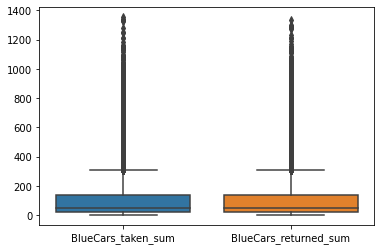

In [11]:
# Outlier detection
# BlueCars_taken and BlueCars_returned

sns.boxplot(data=autolib_df[['BlueCars_taken_sum','BlueCars_returned_sum']])

The blue cars dataset is skewed towards the left with a large number of entries being below 200.

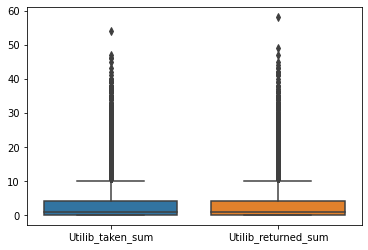

In [12]:
# Outlier detection
# Utilib_taken_sum and Utilib_returned_sum

sns.boxplot(data=autolib_df[['Utilib_taken_sum','Utilib_returned_sum']])

The Utilib cars dataset is skewed towards the left, with a large number of entries being below 10.

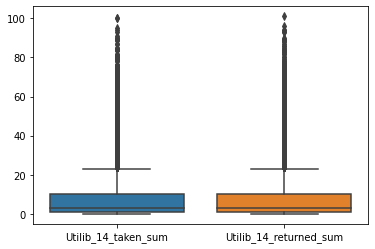

In [13]:
# Outlier detection
# Utilib_14_taken_sum and Utilib_14_returned_sum 

sns.boxplot(data=autolib_df[['Utilib_14_taken_sum','Utilib_14_returned_sum']])

The Utilib_14 cars dataset is skewed towards the right, with a large number of entries being below 20.

In [14]:
Q1 = autolib_df.quantile(0.25)
Q3 = autolib_df.quantile(0.75)

IQR = Q3 - Q1
IQR

Postal code               2070.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64

## 5. Exploratory Analysis

### 5.1 Univariate Analysis

In [15]:
#Information about the dataset
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   dayOfWeek               16085 non-null  int64 
 3   day_type                16085 non-null  object
 4   BlueCars_taken_sum      16085 non-null  int64 
 5   BlueCars_returned_sum   16085 non-null  int64 
 6   Utilib_taken_sum        16085 non-null  int64 
 7   Utilib_returned_sum     16085 non-null  int64 
 8   Utilib_14_taken_sum     16085 non-null  int64 
 9   Utilib_14_returned_sum  16085 non-null  int64 
 10  Slots_freed_sum         16085 non-null  int64 
 11  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1.5+ MB


In [16]:
# Finding the mean of the dataset

autolib_df[{'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].mean()

Utilib_14_taken_sum         8.600560
BlueCars_taken_sum        125.926951
Utilib_taken_sum            3.698290
Slots_freed_sum            22.629033
BlueCars_returned_sum     125.912714
Slots_taken_sum            22.629282
Utilib_14_returned_sum      8.599192
Utilib_returned_sum         3.699099
dtype: float64

Text(0.5, 1.0, 'Distribution of Blue Cars taken')

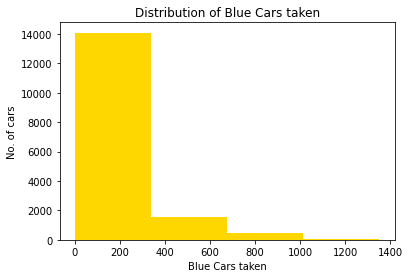

In [17]:
num_bins = 4

plt.hist(autolib_df['BlueCars_taken_sum'], num_bins, histtype="bar", rwidth=2, color='gold')
# Labelling our x axis
plt.xlabel("Blue Cars taken")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Blue Cars taken")

The blue cars dataset is skewed to the right with most of the data lying between 0 and 300.

Text(0.5, 1.0, 'Distribution of Utilib Cars taken')

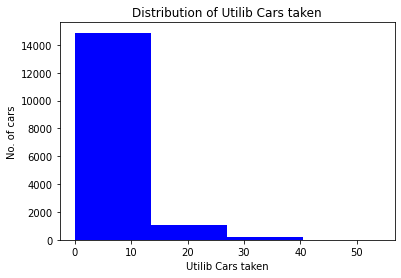

In [18]:
num_bins = 4

plt.hist(autolib_df['Utilib_taken_sum'], num_bins, histtype="bar", rwidth=2, color='blue')
#plt.hist(autolib_df['BlueCars_returned_sum'], num_bins, histtype="bar", rwidth=2, color='black')
# Labelling our x axis
plt.xlabel("Utilib Cars taken")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib Cars taken")

The Utilib cars dataset is skewed to the right with most of the data lying between 0 and 10.

Text(0.5, 1.0, 'Distribution of Utilib_14 Cars taken')

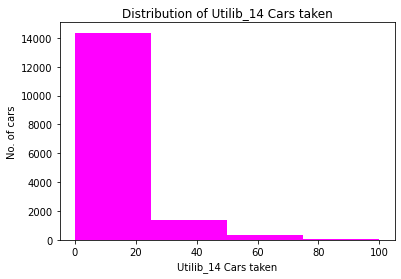

In [19]:
num_bins = 4

plt.hist(autolib_df['Utilib_14_taken_sum'], num_bins, histtype="bar", rwidth=2, color='fuchsia')
#plt.hist(autolib_df['BlueCars_returned_sum'], num_bins, histtype="bar", rwidth=2, color='black')
# Labelling our x axis
plt.xlabel("Utilib_14 Cars taken")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib_14 Cars taken")

The Utilib cars dataset is skewed to the right with most of the data lying between 0 and 20.

Text(0.5, 1.0, 'Distribution of Blue Cars returned')

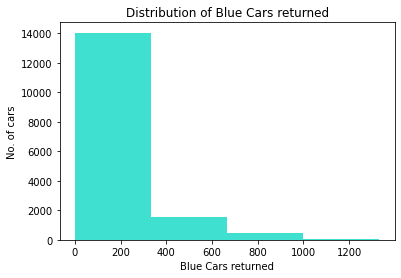

In [20]:
num_bins = 4

plt.hist(autolib_df['BlueCars_returned_sum'], num_bins, histtype="bar", rwidth=2, color='turquoise')
#plt.hist(autolib_df['BlueCars_returned_sum'], num_bins, histtype="bar", rwidth=2, color='black')
# Labelling our x axis
plt.xlabel("Blue Cars returned")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Blue Cars returned")

Text(0.5, 1.0, 'Distribution of Utilib Cars returned')

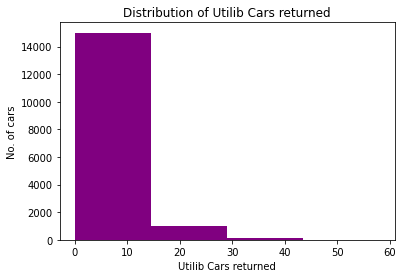

In [21]:
num_bins = 4

plt.hist(autolib_df['Utilib_returned_sum'], num_bins, histtype="bar", rwidth=2, color='purple')
# Labelling our x axis
plt.xlabel("Utilib Cars returned")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib Cars returned")

Text(0.5, 1.0, 'Distribution of Utilib_14 Cars returned')

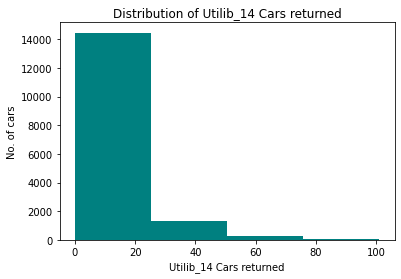

In [22]:
num_bins = 4

plt.hist(autolib_df['Utilib_14_returned_sum'], num_bins, histtype="bar", rwidth=1, color='Teal')
# Labelling our x axis
plt.xlabel("Utilib_14 Cars returned")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib_14 Cars returned")

In [23]:
# Removing the outliers
autolib_df1 = autolib_df[~((autolib_df < (Q1 - 1.5 * IQR)) |(autolib_df > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_df1.head()

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,2,weekday,11,13,0,0,0,0,1,1
3902,91330,1/4/2018,3,weekday,5,8,0,0,0,0,1,2
3903,91330,1/5/2018,4,weekday,10,6,0,0,0,0,1,1


**5.2 Bivariate analysis**

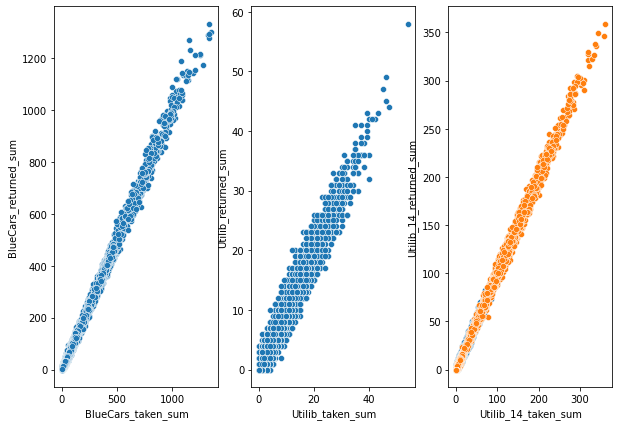

In [58]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 7))
fig.suptitle('')
sns.scatterplot(x= autolib_df.BlueCars_taken_sum , y= autolib_df.BlueCars_returned_sum, ax=ax1)
sns.scatterplot(x= autolib_df.Utilib_taken_sum, y= autolib_df.Utilib_returned_sum, ax=ax2)
sns.scatterplot(x=autolib_df.Utilib_14_taken_sum , y= autolib_df.Utilib_14_returned_sum, ax=ax3)

plt.show()

> There is a strong correlation within the pairs of the related data

In [59]:
# Finding a correlation between the dataset
pearson_coeff = autolib_df["BlueCars_taken_sum"].corr(autolib_df["BlueCars_returned_sum"], method="pearson") 
print('BlueCars', pearson_coeff)
pearson_coeff = autolib_df['Utilib_taken_sum'].corr(autolib_df["Utilib_returned_sum"], method="pearson") 
print('Utilib_Corr', pearson_coeff)
pearson_coeff = autolib_df["Utilib_14_taken_sum"].corr(autolib_df["Utilib_14_returned_sum"], method="pearson") 
print('Utilib_14_Corr', pearson_coeff)

BlueCars 0.9986597051672196
Utilib_Corr 0.9819819805363549
Utilib_14_Corr 0.9920620707048168


> There is a strong correlation between cars taken and cars returned.

### 6. Hypothesis Testing Computation

#### 6.1 Sampling

Before sampling we need to create columns for all the values we need for our tests which are:

**1. Total number of cars taken and cars returned**

In [24]:
autolib_df['total_vehicles_taken'] = autolib_df['BlueCars_taken_sum'] + autolib_df['Utilib_taken_sum'] + autolib_df['Utilib_14_taken_sum']

autolib_df['total_vehicles_returned'] = autolib_df['BlueCars_returned_sum'] + autolib_df['Utilib_returned_sum'] + autolib_df['Utilib_14_returned_sum']

**2.Total number of Utilib and Utilib_14 cars**

In [25]:
autolib_df['total_Utilib_vehicles_taken'] =autolib_df['Utilib_taken_sum'] + autolib_df['Utilib_14_taken_sum']

In [26]:
# Using the random int generator to randomly select one of the days between 0 and 4
random_number = np.random.randint(0, 4)
random_number

3

In [27]:
sampled_autolib_df = autolib_df[autolib_df['dayOfWeek']== random_number]

sampled_autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 3 to 16079
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Postal code                  2268 non-null   int64 
 1   date                         2268 non-null   object
 2   dayOfWeek                    2268 non-null   int64 
 3   day_type                     2268 non-null   object
 4   BlueCars_taken_sum           2268 non-null   int64 
 5   BlueCars_returned_sum        2268 non-null   int64 
 6   Utilib_taken_sum             2268 non-null   int64 
 7   Utilib_returned_sum          2268 non-null   int64 
 8   Utilib_14_taken_sum          2268 non-null   int64 
 9   Utilib_14_returned_sum       2268 non-null   int64 
 10  Slots_freed_sum              2268 non-null   int64 
 11  Slots_taken_sum              2268 non-null   int64 
 12  total_vehicles_taken         2268 non-null   int64 
 13  total_vehicles_returned      226

#### 6.2 Hypothesis test 1: 
>On a given weekday, the average number of vehicles (BlueCars, Utilib and Utilib_14) taken is more than the average number of vehicles being returned.
The confidence level for this test will be 0.95 hence an alpha value of 0.05.   
Ho:Average vehicles taken<= Average vehicles returned     
                       Ha:Average vehicles taken > Average vehicles returned

In [56]:
# Calculate the Z score

## Total population mean and std deviation
total_population_mean = autolib_df['total_vehicles_taken'].mean()

total_popultation_std_dev = autolib_df['total_vehicles_taken'].std()

sample_population_mean = sampled_autolib_df['total_vehicles_returned'].mean()

total_sampled_population = sampled_autolib_df['total_vehicles_returned'].count()

## Compute the z score
zscore_hypothesis_1 = (sample_population_mean - total_population_mean) / total_popultation_std_dev

zscore_hypothesis_1

-0.05397555479832159

In [57]:
# Calculating the P value

prob_hypothesis_1 = 1 - stats.norm.cdf(zscore_hypothesis_1)
prob_hypothesis_1

0.5215226798558439

The p value of 0.52 is greater than the alpha value of 0.05. For this reason, the null hypothesis is accepted.
The average number of vehicles (BlueCars, Utilib and Utilib_14) taken is less or equal to the average number of vehicles being returned.

#### 6.3 Hypothesis test 2: 
>On a given weekday, the number of BlueCars taken is more than the total combined number of Utilib and Utilib_14 cars.
The confidence level for this test will be 0.95 hence an alpha value of 0.05.

In [46]:
# Average number of all BluCars taken during the period of our review
average_of_BlueCars = autolib_df['BlueCars_taken_sum'].mean()
average_of_Utilib_vehicles=autolib_df['total_Utilib_vehicles_taken'].mean()
# Average of a sample of Utilib and Utilib_14 cars taken on a random day
sampled_Bluecars_mean=sampled_autolib_df['BlueCars_taken_sum'].mean()
sampled_Utilib_vehicles_mean = sampled_autolib_df['total_Utilib_vehicles_taken'].mean()

# Standard deviation of all BluCars taken during the period of our review
std_dev_of_BlueCars = autolib_df['BlueCars_taken_sum'].std()
std_dev_of_Utilib_vehicles = autolib_df['total_Utilib_vehicles_taken'].std()

In [55]:
## Compute the z score
zstat = (sampled_Utilib_vehicles_mean-average_of_BlueCars)/std_dev_of_BlueCars
zstat

-0.6180237330304179

In [54]:
# Calculating the P value

prob_hypothesis_2 = 1 - stats.norm.cdf(zstat)
prob_hypothesis_2

0.7317201528454087

The p value of 0.4998 is greater than the alpha value of 0.05. For this reason, the null hypothesis is accepted, that the number of BlueCars taken is less than or equal to the total combined number of Utilib and Utilib_14 cars.

#### 6.3 Hypothesis test 3: 
>The number of vehicles taken in postal code 75015 is equal to the number of vehicles taken in postal code 75017.
The confidence level for this test will be 0.95 hence an alpha value of 0.05.

In [38]:
# Average number of vehicles taken in postal code 75015 and 75017
vehicles_in_75015 =autolib_df[autolib_df['Postal code']== 75015]
vehicles_in_75015_avg = vehicles_in_75015['total_vehicles_taken'].mean()
vehicles_in_75017 =autolib_df[autolib_df['Postal code']== 75017]
vehicles_in_75017_avg = vehicles_in_75017['total_vehicles_taken'].mean()


# Average sample of number of vehicles taken in postal code 75017
sample_vehicles_in_75015 = sampled_autolib_df[sampled_autolib_df['Postal code']== 75015]
sample_vehicles_in_75015_avg = sample_vehicles_in_75015['total_vehicles_taken'].mean()
sample_vehicles_in_75017 = sampled_autolib_df[sampled_autolib_df['Postal code']== 75017]
sample_vehicles_in_75017_avg = sample_vehicles_in_75017['total_vehicles_taken'].mean()

# Standard deviation of vehicles taken in postal code 75015
vehicles_in_75015_std_dev= vehicles_in_75015['total_vehicles_taken'].std() 
vehicles_in_75017_std_dev = vehicles_in_75017['total_vehicles_taken'].std() 

In [50]:
## Compute the z score
zstat = (sample_vehicles_in_75017_avg-vehicles_in_75015_avg)/vehicles_in_75015_std_dev
zstat

-1.051098226687255

In [51]:
# Calculating the P value

prob_hypothesis_3 = 1 - stats.norm.cdf(zstat)
prob_hypothesis_3

0.853393260768986

The p value of 0.85 is greater than the alpha value of 0.05. For this reason, the null hypothesis is accepted, that the number of vehicles taken in postal code 75015 is equal to the number of vehicles taken in postal code 75017.